# Data Science Assigment 1 - Iris dataset

The goal is to determine wether or not the various classes of Iris are separated.

## Method 2 - visualisation

### Univariate plots, raw data

In [1]:
import pandas as pd

iris = pd.read_csv("data/iris.csv")

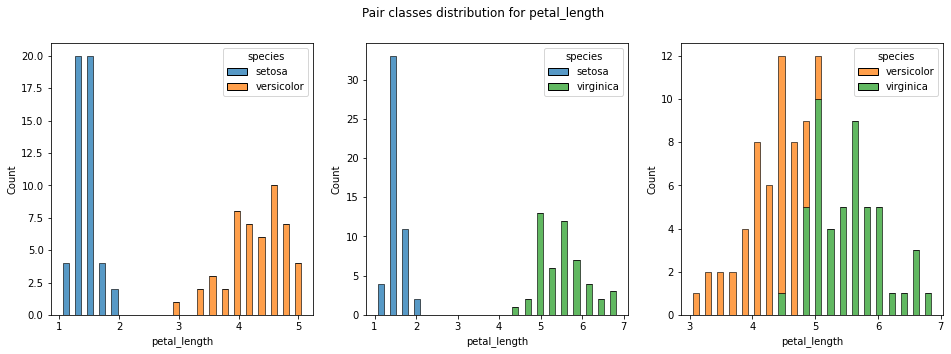

In [2]:
from methods.visualisation import hist_plot

hist_plot(iris, "petal_length")

### Univariate plots, transformed data

#### Full dataset PCA

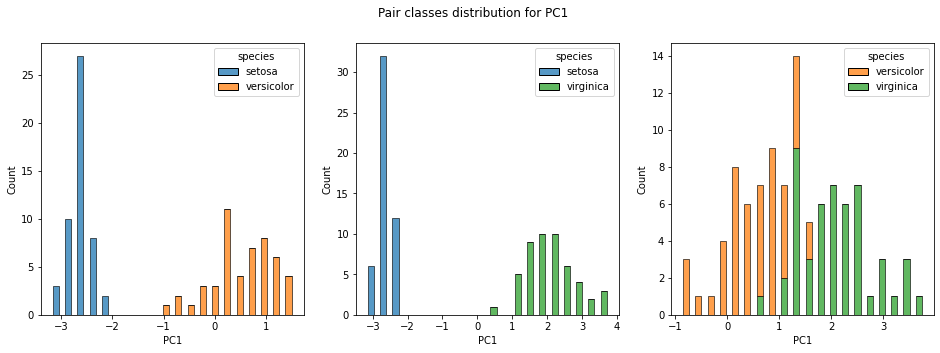

In [3]:
from methods.visualisation import run_pca

x_transformed, _, _ = run_pca(iris)

iris_trans = pd.DataFrame(x_transformed, columns=[f"PC{i+1}" for i in range(x_transformed.shape[1])])
iris_trans["species"] = iris['species']

hist_plot(iris_trans, "PC1")

Plotting the raw data, we see that in each case we distinguish (more or less) clearly the three types of flowers. We can therefore conclude that each variable carries information (typically statistical variance) about the type of flower independently.

If we could choose only one variable, it might be the width of the petals, but the results would be far from perfect. In fact, *virginica* and *versicolor* slightly overlap so are not linearly separable.

#### PCA on one variable

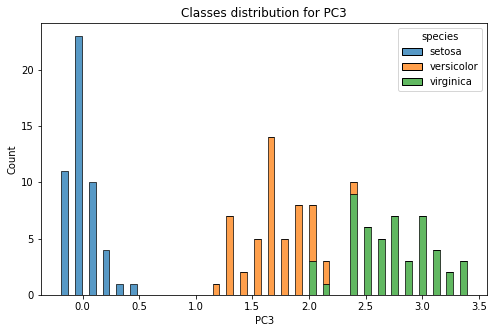

In [4]:
x_transformed, _, _ = run_pca(iris, scale=True, projection="setosa")

iris_trans = pd.DataFrame(x_transformed, columns=[f"PC{i+1}" for i in range(x_transformed.shape[1])])
iris_trans["species"] = iris['species']

hist_plot(iris_trans, "PC3", pairs=False)

### Multivariate plots, raw data

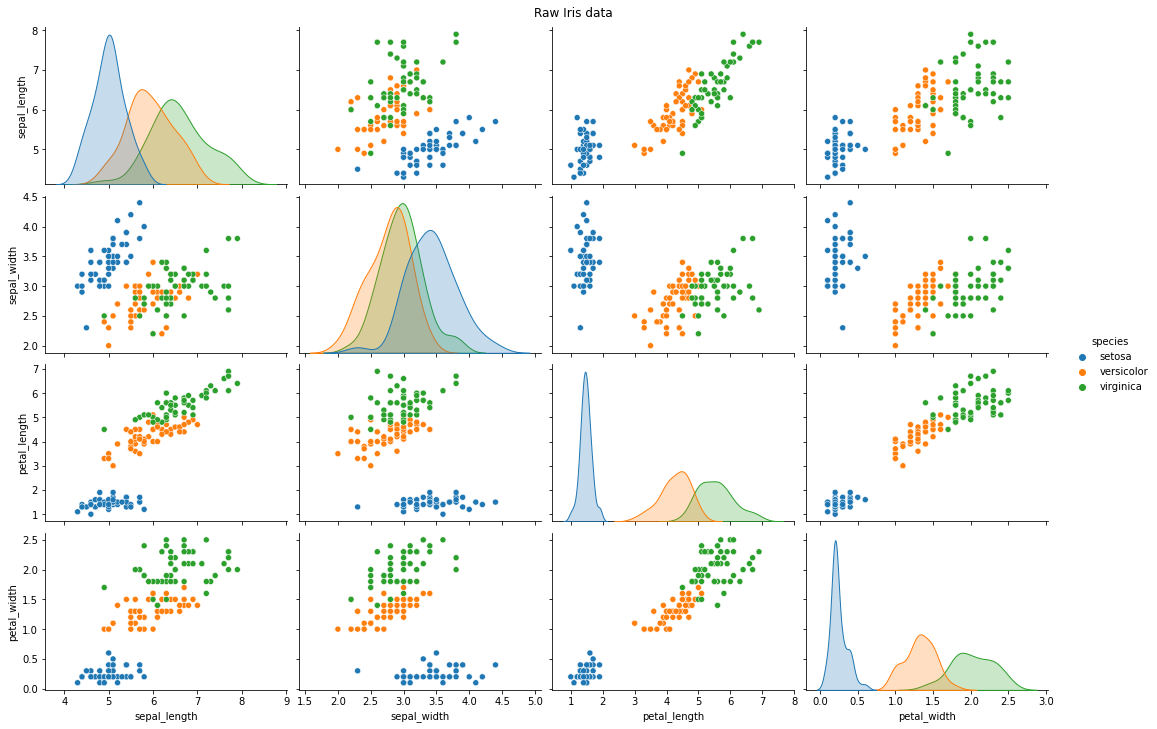

In [5]:
from seaborn import pairplot
import matplotlib.pyplot as plt

pplt = pairplot(iris, hue="species", aspect=1.5)
pplt.fig.suptitle("Raw Iris data", y=1.01)
plt.show()

### Multivariate plots, transformed data

#### PCA on raw data

In [6]:
_, eighen_vectors, eighen_values = run_pca(iris)

print(eighen_vectors)
print(eighen_values)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
[4.22824171 0.24267075 0.0782095  0.02383509]


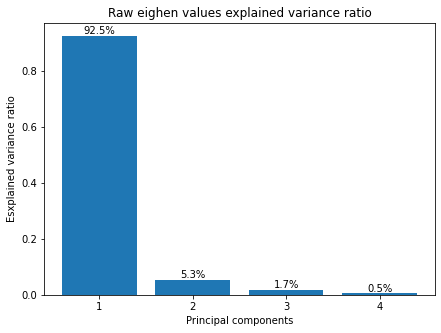

In [7]:
plt.figure(figsize=(7, 5))
bar = plt.bar(
    [str(i+1) for i in range(eighen_values.shape[0])],
    [l/sum(eighen_values) for l in eighen_values], align='center'
)

plt.ylabel("Esxplained variance ratio")
plt.xlabel("Principal components")
plt.title("Raw eighen values explained variance ratio")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f"{height*100:.1f}%", ha='center', va='bottom')

#### PCA on scaled data

In [8]:
_, eighen_vectors, eighen_values = run_pca(iris, scale=True)

print(eighen_vectors)
print(eighen_values)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
[2.93808505 0.9201649  0.14774182 0.02085386]


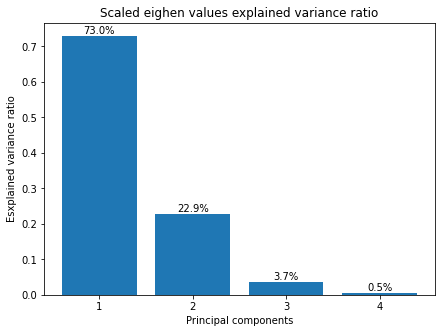

In [9]:
plt.figure(figsize=(7, 5))
bar = plt.bar(
    [str(i+1) for i in range(eighen_values.shape[0])],
    [l/sum(eighen_values) for l in eighen_values], align='center'
)

plt.ylabel("Esxplained variance ratio")
plt.xlabel("Principal components")
plt.title("Scaled eighen values explained variance ratio")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f"{height*100:.1f}%", ha='center', va='bottom')

#### PCA on one class

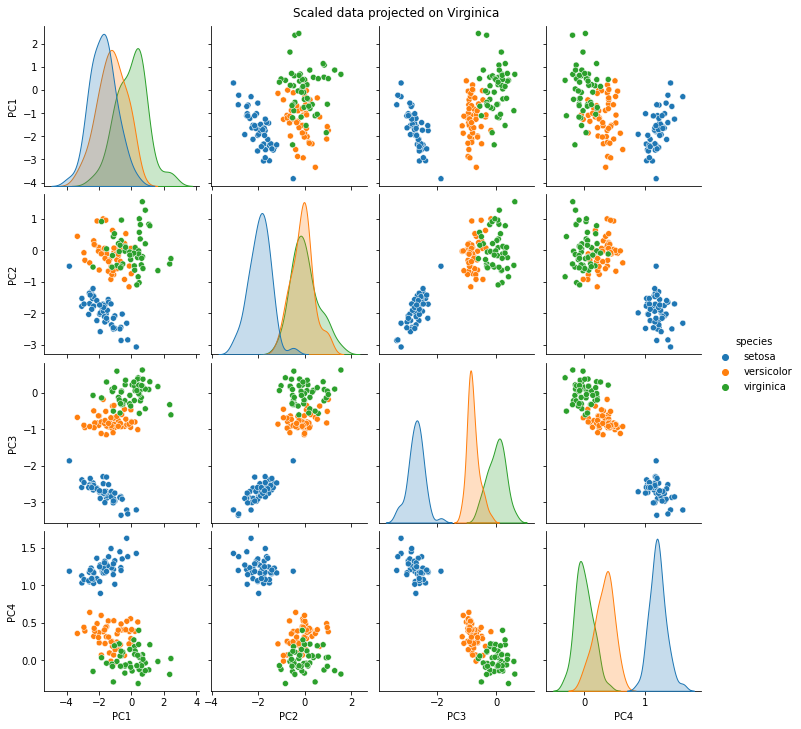

In [10]:
run_pca(
    iris, scale=True, projection="virginica",
    plot=True, title="Scaled data projected on Virginica"
);